## ${\textbf{Ahmed Abd EL-Fattah Dawood Bakr}}$
## ${\textbf{212103880}}$

In [2]:
# loading the needed libraryies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

## loading the data and data cleaning

In [4]:
# loading the dataset
df = pd.read_csv("ObesityDataSet.csv")
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Showing the statistical Descriptions of all columns
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [7]:
#check for missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
# counting values of the target
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [9]:
# check for duplicates
df.duplicated().value_counts()

False    2087
True       24
Name: count, dtype: int64

In [10]:
# removing duplicates rows from the dataset
df = df.drop_duplicates()

In [11]:
df.duplicated().value_counts()

False    2087
Name: count, dtype: int64

In [12]:
# counting values of the target after dropping the dublicate rows
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

## converting categorical to numerical

In [14]:
# converting categorial feature to numericaL using LabelEncoder
label_encoder = LabelEncoder()

Columns = ["NObeyesdad","Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]
for i in range(len(Columns)):
    Country_keys = df[Columns[i]]
    Country_keys = Country_keys.tolist()
    
    Country_values = label_encoder.fit_transform(df[Columns[i]])
    Country_values = Country_values.tolist()
    
    df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])
    
    Country_dict = dict(zip(Country_keys, Country_values))
    print(Country_dict)

{'Normal_Weight': 1, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6, 'Obesity_Type_I': 2, 'Insufficient_Weight': 0, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4}
{'Female': 0, 'Male': 1}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'Sometimes': 2, 'Frequently': 1, 'Always': 0, 'no': 3}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 3, 'Sometimes': 2, 'Frequently': 1, 'Always': 0}
{'Public_Transportation': 3, 'Walking': 4, 'Automobile': 0, 'Motorbike': 2, 'Bike': 1}


C:\Users\AlShimaa\AppData\Local\Temp\ipykernel_26396\1397271252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])
C:\Users\AlShimaa\AppData\Local\Temp\ipykernel_26396\1397271252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])
C:\Users\AlShimaa\AppData\Local\Temp\ipykernel_26396\1397271252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   int32  
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int32  
 5   FAVC                            2087 non-null   int32  
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   int32  
 9   SMOKE                           2087 non-null   int32  
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   int32  
 12  FAF                             2087 no

## data visualization

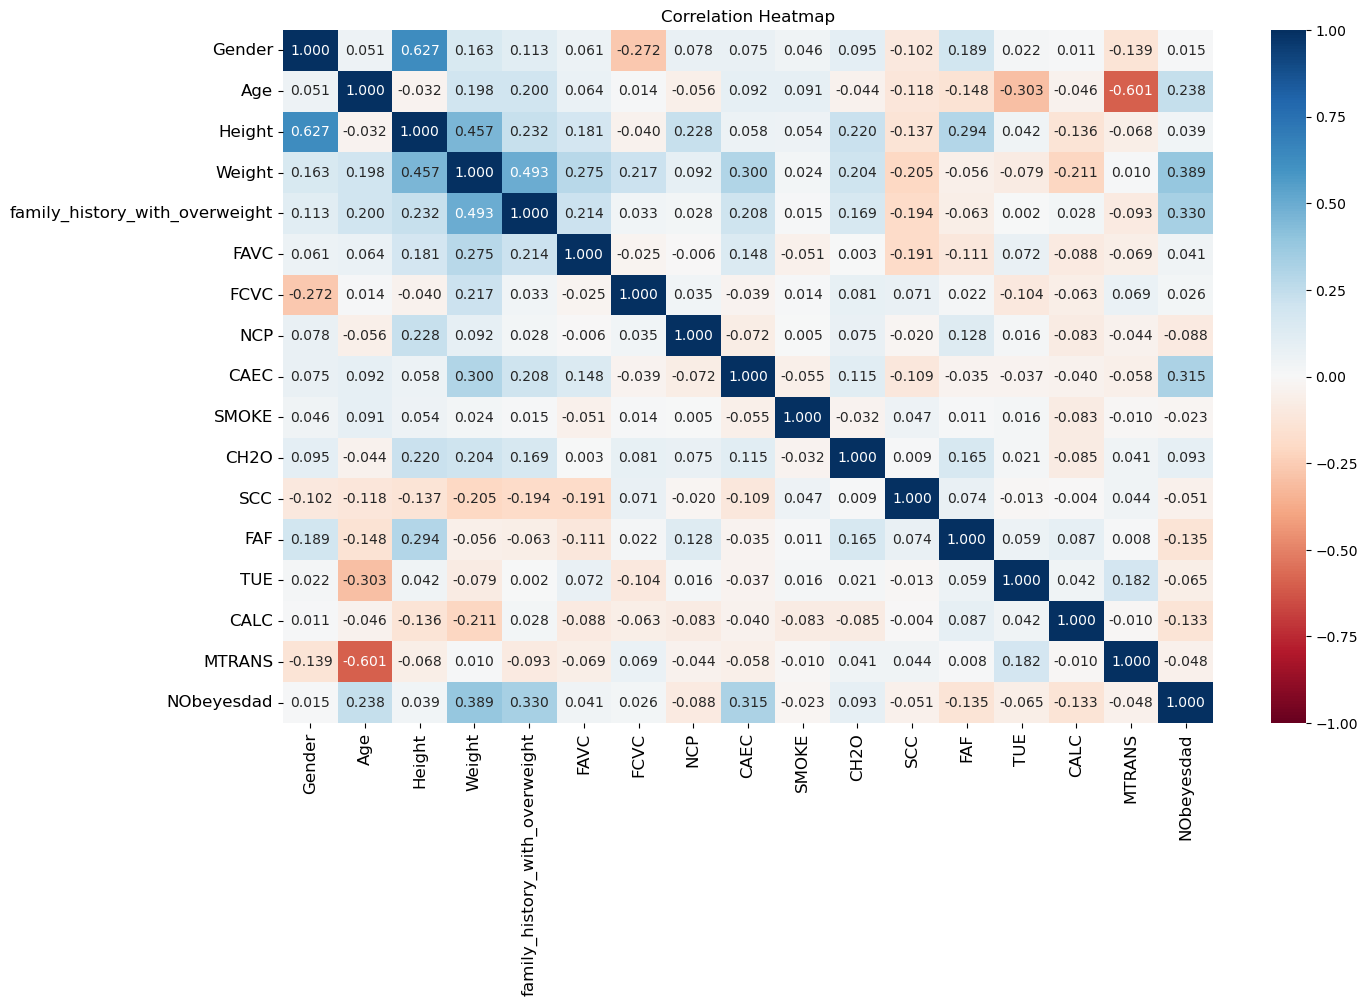

In [29]:
plt.figure(figsize = (15,9))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1, 
               cbar=True, 
               fmt=".3f")
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 800x600 with 0 Axes>

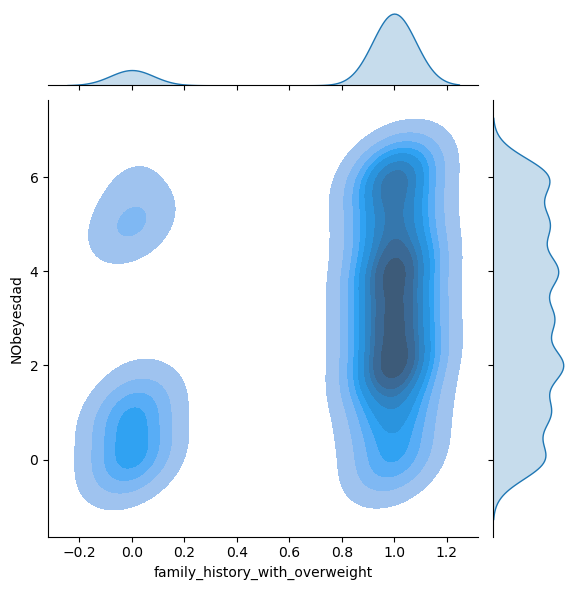

In [30]:
plt.figure(figsize=(8,6))
sns.jointplot(x='family_history_with_overweight', y='NObeyesdad', data=df, kind='kde', fill= True)
plt.show()

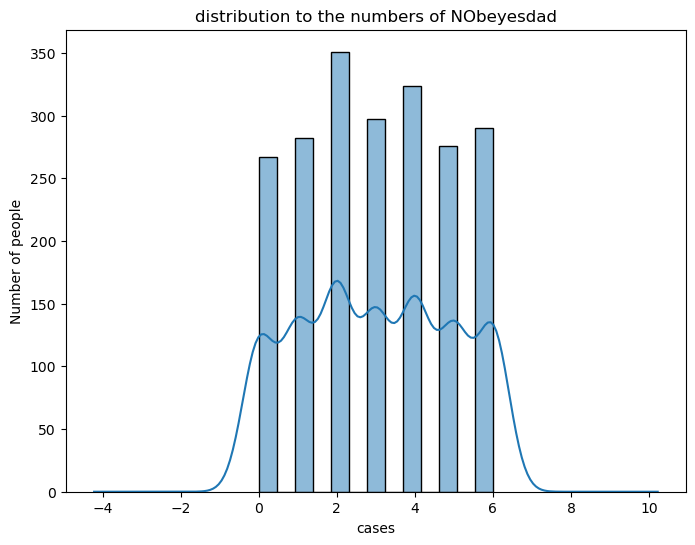

In [32]:
# Distribution of the target variable
plt.figure(figsize=(8,6))
sns.histplot(df['NObeyesdad'], kde = True, kde_kws=dict(cut = 10))
plt.title('distribution to the numbers of NObeyesdad')
plt.xlabel('cases')
plt.ylabel('Number of people')
plt.show()

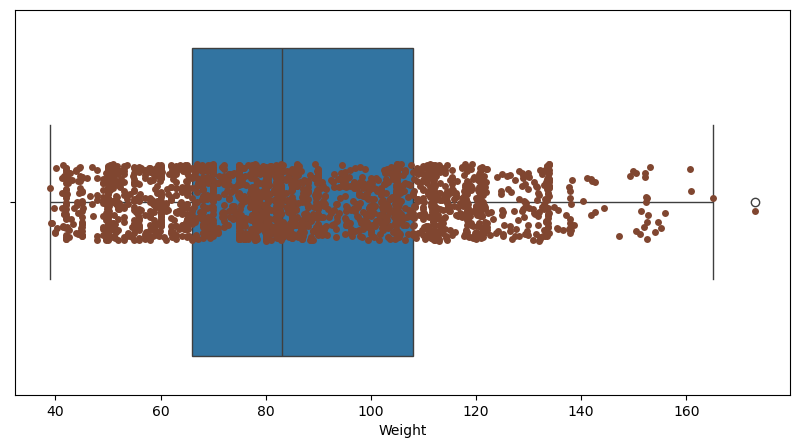

In [33]:
# cheaking the outliers in the feature 'Weight'
plt.figure(figsize = (10,5))
sns.boxplot(x='Weight', data=df)
sns.stripplot(x='Weight', data=df, color="#804630")
plt.show()

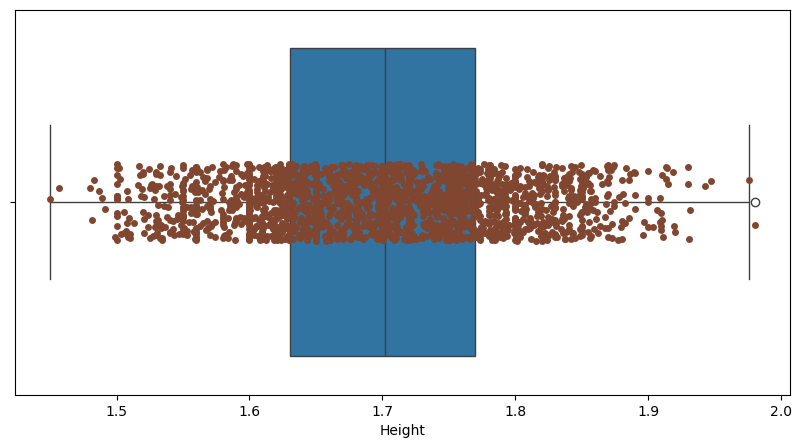

In [34]:
# cheaking the outliers in the feature 'Height'
plt.figure(figsize = (10,5))
sns.boxplot(x='Height', data=df)
sns.stripplot(x='Height', data=df, color="#804630")
plt.show()

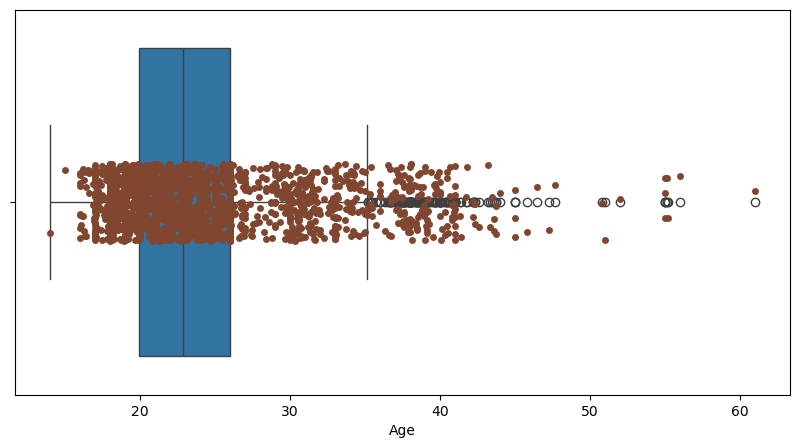

In [35]:
# cheaking the outliers in the feature 'Age'
plt.figure(figsize = (10,5))
sns.boxplot(x='Age', data=df)
sns.stripplot(x='Age', data=df, color="#804630")
plt.show()

## feature selection

In [38]:
# We will apply feature selection method that can help us to choose the effective features in model 
# instead of choosing all the effective ones and non-effective ones that can help us in best modeling 

In [42]:
feat = ['Age','Height','Weight','FCVC','CAEC','FAF','CALC']

In [46]:
x = df[feat]
y = df['NObeyesdad']

In [48]:
df.describe()

Gender          Age       Height       Weight  \
count  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.504073    24.353090     1.702674    86.858730   
std       0.500103     6.368801     0.093186    26.190847   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.915937     1.630178    66.000000   
50%       1.000000    22.847618     1.701584    83.101100   
75%       1.000000    26.000000     1.769491   108.015907   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2087.000000  2087.000000  2087.000000  2087.000000   
mean                         0.825108     0.883565     2.421466     2.701179   
std                          0.379966     0.320823     0.534737     0.764614   
min                          0.000000     0.000000     1.000000     1.000000   
25%                          1.000000     1.000000     2.000000     2.697467   
50%                          1.000000     1.000000     2.396265     3.000000   
75%                          1.000000     1.000000     3.000000     3.000000   
max                          1.000000     1.000000     3.000000     4.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      1.853857     0.021083     2.004749     0.045999     1.012812   
std       0.459494     0.143695     0.608284     0.209533     0.853475   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     0.000000     1.590922     0.000000     0.124505   
50%       2.000000     0.000000     2.000000     0.000000     1.000000   
75%       2.000000     0.000000     2.466193     0.000000     1.678102   
max       3.000000     1.000000     3.000000     1.000000     3.000000   

               TUE         CALC       MTRANS   NObeyesdad  
count  2087.000000  2087.000000  2087.000000  2087.000000  
mean      0.663035     2.270244     2.358888     3.014375  
std       0.608153     0.517008     1.265402     1.948470  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     2.000000     3.000000     1.000000  
50%       0.630866     2.000000     3.000000     3.000000  
75%       1.000000     3.000000     3.000000     5.000000  
max       2.000000     3.000000     4.000000     6.000000

## modeling

In [50]:
# Decision Tree Classifier model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable
features = x   # Features
target = y # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier with specified parameters
dt_classifier = DecisionTreeClassifier(random_state=45, criterion='gini', max_depth=2, min_samples_leaf=7)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

[[59  0  0  0  0  0  0]
 [35  0  0  0  0  0 26]
 [ 0  0  0 17  3  0 50]
 [ 0  0  0 61  3  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 55]
 [ 0  0  0  0  0  0 49]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        59
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00        70
           3       0.78      0.95      0.86        64
           4       0.91      1.00      0.95        60
           5       0.00      0.00      0.00        55
           6       0.27      1.00      0.43        49

    accuracy                           0.55       418
   macro avg       0.37      0.56      0.43       418
weighted avg       0.37      0.55      0.43       418



D:\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Apps\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
# using Gridsearch for best performancing Decision Tree Classifier model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV
number = [5,11,13,41,42,101]
numbers = list(range(1, 11))
param_grid = {'random_state': number,
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf': numbers,
            'max_depth': numbers} 
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'random_state': 41}

In [91]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=41)

In [92]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[56  3  0  0  0  0  0]
 [ 4 54  0  0  0  3  0]
 [ 0  0 69  0  1  0  0]
 [ 0  0  1 63  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  2  0  0  0 48  5]
 [ 0  0  0  0  0  1 48]]


In [93]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        59
           1       0.92      0.89      0.90        61
           2       0.99      0.99      0.99        70
           3       1.00      0.98      0.99        64
           4       0.98      1.00      0.99        60
           5       0.92      0.87      0.90        55
           6       0.91      0.98      0.94        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [98]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the dataset: separate features and target variable
features = x 
target = y

# Splitting the dataset into training and testing sets
# 20% of data is used for testing, 80% for training. Random state ensures reproducible splits
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=14)
# Initializing the KNN classifier with 179 neighbors

knn = KNeighborsClassifier(n_neighbors=13)

# Training the KNN classifier on the training data
knn.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = knn.predict(X_test)

# accuracy
print(classification_report(y_test,y_pred))

# Printing the confusion matrix to evaluate the performance of the classification
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.94      0.83        51
           1       0.78      0.50      0.61        58
           2       0.73      0.90      0.81        67
           3       0.88      0.91      0.89        54
           4       0.95      0.99      0.97        77
           5       0.69      0.64      0.67        56
           6       0.60      0.51      0.55        55

    accuracy                           0.78       418
   macro avg       0.77      0.77      0.76       418
weighted avg       0.78      0.78      0.77       418

[[48  3  0  0  0  0  0]
 [16 29  0  0  0 11  2]
 [ 0  0 60  4  0  0  3]
 [ 0  0  0 49  4  0  1]
 [ 0  0  0  1 76  0  0]
 [ 0  4  3  0  0 36 13]
 [ 0  1 19  2  0  5 28]]


In [100]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
numbers = list(range(3, 32))
p_list= list(range(1,4))
param_grid = {'n_neighbors': numbers,
             'weights': [None, 'uniform', 'distance'],
             'algorithm': [None, 'auto', 'ball_tree', 'kd_tree', 'brute'],
             'metric': ['minkowski'],
             'p': p_list} 
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,verbose=1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 1305 candidates, totalling 6525 fits


D:\Apps\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1305 fits failed out of a total of 6525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1305 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Apps\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Apps\Anaconda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Apps\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Apps\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [101]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [102]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[50  1  0  0  0  0  0]
 [ 5 37  0  0  0 12  4]
 [ 0  0 62  3  0  1  1]
 [ 0  0  1 51  1  0  1]
 [ 0  0  0  0 77  0  0]
 [ 0  1  0  0  0 50  5]
 [ 0  0  4  0  0  4 47]]


In [103]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.95      0.64      0.76        58
           2       0.93      0.93      0.93        67
           3       0.94      0.94      0.94        54
           4       0.99      1.00      0.99        77
           5       0.75      0.89      0.81        56
           6       0.81      0.85      0.83        55

    accuracy                           0.89       418
   macro avg       0.90      0.89      0.89       418
weighted avg       0.90      0.89      0.89       418



In [54]:
# RandomForest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Preparing the dataset: separate into features and target variable
features = x
target = y                

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=41)

# Setting up the RandomForestClassifier with specific parameters
rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy' , min_samples_leaf = 7 , max_depth = 7, n_jobs=1)

# Training the RandomForest model on the training data
rf.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred = rf.predict(X_test)

# Calculate accuracy
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test, y_pred))

[[56  5  0  0  0  0  0]
 [ 2 47  0  0  0  5  0]
 [ 0  0 69  1  1  0  1]
 [ 0  0  0 62  0  0  0]
 [ 0  0  0  0 75  0  0]
 [ 0  2  0  0  0 43  5]
 [ 0  3  2  0  0  1 38]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.82      0.87      0.85        54
           2       0.97      0.96      0.97        72
           3       0.98      1.00      0.99        62
           4       0.99      1.00      0.99        75
           5       0.88      0.86      0.87        50
           6       0.86      0.86      0.86        44

    accuracy                           0.93       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [ ]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
numbers = list(range(1, 32))
param_grid = {'n_estimators': numbers,
            'random_state': numbers,
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf': numbers,
            'max_depth': numbers,
             } 
grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 1847042 candidates, totalling 9235210 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=1;, score=0.308 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=1;, score=0.302 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=1;, score=0.305 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=1;, score=0.293 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=1;, score=0.303 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=2;, score=0.296 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, n_estimators=1, random_state=2;, score=0.290 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_s

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy

In [ ]:
print(classification_report(y_test,grid_predictions))

In [56]:
# Support Vector Machines (SVM)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

features = x
target = y

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=101)
model = SVC(kernel = 'poly', gamma = 1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(confusion_matrix(y_test,y_preds))

print(classification_report(y_test, y_preds))

[[42  0  0  0  0  0  0]
 [ 5 53  0  0  0  1  0]
 [ 0  0 68  1  0  0  2]
 [ 0  0  2 60  0  0  0]
 [ 0  0  0  1 71  0  0]
 [ 0  1  0  0  0 48  2]
 [ 0  0  2  0  0  4 55]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        42
           1       0.98      0.90      0.94        59
           2       0.94      0.96      0.95        71
           3       0.97      0.97      0.97        62
           4       1.00      0.99      0.99        72
           5       0.91      0.94      0.92        51
           6       0.93      0.90      0.92        61

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [ ]:
# using Gridsearch for best performancing model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'degree': [2, 3, 4, 5],
              'kernel': ['poly', 'linear']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.952 total time=  12.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.967 total time=  18.2s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.958 total time=   7.9s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.925 total time=   7.2s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=poly;, score=0.955 total time=   7.8s
[CV 1/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.731 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.716 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.695 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=0.1, kernel=poly;, score=0.925 total time=   1.0s


In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

In [ ]:
accuracy = accuracy_score(y_test, grid_predictions)
accuracy